## 6. EDOs de 1ª ordem e método de Euler

A aproximação numérica para a derivada de 1ª ordem de uma função $y=f(x)$ em um ponto $x_i$ pode ser obtida por diferença finita, em que a inclinação da função é estimada usando valores da função na vizinhança do ponto. 

Chamamos aproximação _**para frente**_ quando se estima $f'(x_i)$ usando a inclinação da reta secante que passa pelos pontos $(x_i, f(x_i))$ e $(x_{i+1}, f(x_{i+1}))$. A aproximação _**para trás**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i}, f(x_{i}))$. E a aproximação _**central**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i+1}, f(x_{i+1}))$.

A seguir são mostradas as fórmulas e uma representação geométrica  que ilustra a aproximação de $f'(x_i)$ _para frente_, _para trás_ e _central_ respectivamente: 


$$f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_i)}{x_{i+1}-x_i} \quad\quad\quad\quad\quad
f'(x_i) \simeq \frac{f(x_{i}) - f(x_{i-1})}{x_i-x_{i-1}} \quad\quad\quad\quad\quad
f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1}-x_{i-1}}$$


<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_III/refs/heads/main/Notebook%2006%20-%20M%C3%A9todo%20de%20Euler%20para%20EDOs%20e%201%C2%AA%20ordem/imagens/diffs.png" width="960">


As fórmulas de diferenças finitas mostradas acima podem ser obtidas a partir da série de Taylor para a função $f(x)$ desenvolvida em torno de $x=x_i$ o que nos fornece

$$f(x) = f(x_i) + f'(x_i)(x - x_i) + f''(x_i)\frac{(x - x_i)^2}{2!} + f'''(x_i)\frac{(x - x_i)^3}{3!} + \cdots$$

Ao aproximarmos $x_{i+1}$ por $x_i$, se considerarmos $h=x_{i+1}-x_i$ suficientemente pequeno, podemos desprezar os termos de ordem mais alta, proporcionais a $(x_{i+1}-x_i)^2$, $(x_{i+1}-x_i)^3$,$ \dots$. 

Assim, a derivada de $f(x)$ em $x_i$ pode ser aproximada por

$$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h} $$

Que é exatamente a fórmula para a aproximação _para frente_ da derivada 1ª de $f$. Observe que nessa aproximação foram desprezados os termos 

$$ O(h^2) = \frac{f''(x_i)h^2}{2} + \frac{f'''(x_i)h^3}{6} + \frac{f''''(x_i)h^4}{24} + \frac{f'''''(x_i)h^5}{120} +\cdots$$

o que mostra que o erro de truncamento depende de $h$. Quanto menor o _passo_ $h$ menor será o erro, no entanto maior será o esforço computacional, o que impossibilita o cálculo com valores de $h$ próximos de zero. 

Em termos de $h$ as fórmulas de aproximação por diferenças finitas ficam com as segiuntes formas:

- _Para frente_: 
$$f'(x_i)\approx\frac{f(x_{i+1})-f(x_i)}{h}$$


- _Para trás_: 
$$f'(x_i)\approx\frac{f(x_{i})-f(x_{i-1})}{h}$$


- _Central_: 
$$f'(x_i)\approx\frac{f(x_{i+1})-f(x_{i-1})}{2h}$$




Veremos no texto e nos exemplos a seguir como usar diferenças finitas para obter soluções numéricas de EDOs de 1º ordem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo 6.1:** A equação diferencial $\frac{du}{dt} = t + 2$ tem solução $ u(t) = \frac{t^2}{2}+2t+ c$ obtida facilmente por integração. Nesse caso a família de soluções, para alguns valores de $c$ é mostrado abaixo.

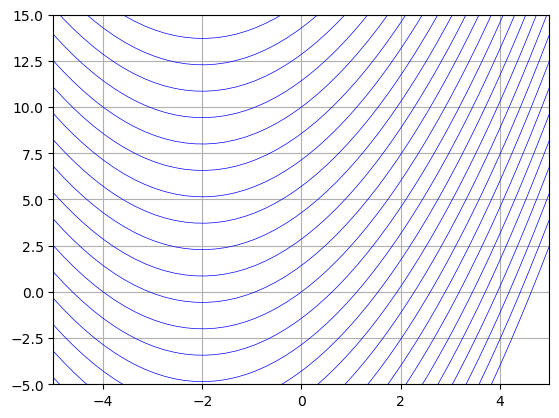

In [2]:
u = lambda t: (t**2/2)+2*t
ti = np.linspace(-5,5)

for c in np.linspace(-20,50,50):
    plt.plot(ti, u(ti)+c, 'b',lw=0.5)
    
plt.ylim(-5,15)
plt.xlim(-5,5)
plt.grid()
plt.show()

Se impormos uma condição inicial, como por exemplo $u(0)= 8$, obtemos o valor $c=8$, o que restringe a solução a uma única curva e não mais à uma família de curvas. Uma equação diferencial com condições iniciais como essa compõem o que chamamos de um *problema de valor inicial* (PVI).

Ou seja, o problema de valor inicial descrito acima pode ser enunciado como

$$ 
\begin{cases} 
\frac {du}{dt}= t+2\\ 
\\
u(0)=8
\end{cases}$$

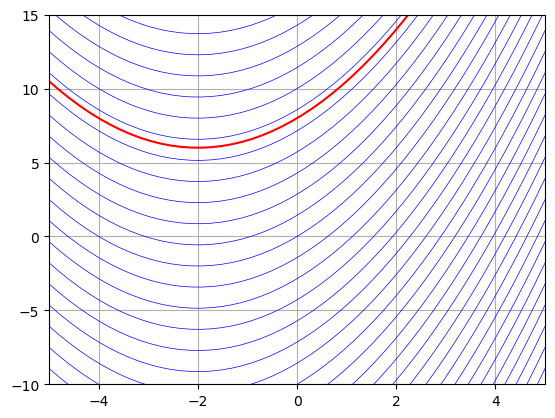

In [3]:
for c in np.linspace(-20,50,50):
    plt.plot(ti, u(ti)-c, 'b',lw=0.5)

# plotando a solução particular
plt.plot(ti, u(ti)+8, 'r')

plt.ylim(-10,15)
plt.xlim(-5,5)
plt.grid()
plt.show()

Se pensarmos nas direções tangentes às curvas-solução em um conjunto de pontos distribuidos no plano temos o que chamamos de **campo de direções** ou **campo de inclinações**. Como a inclinação de uma curva $y$ em um determinado ponto é dada pela sua derivada $y'$ nesse ponto, podemos construir o campo de direções para uma EDO mesmo não tendo encontrado solução alguma. O campo de direções da EDO do Exemplo 6.1 é mostrado abaixo.

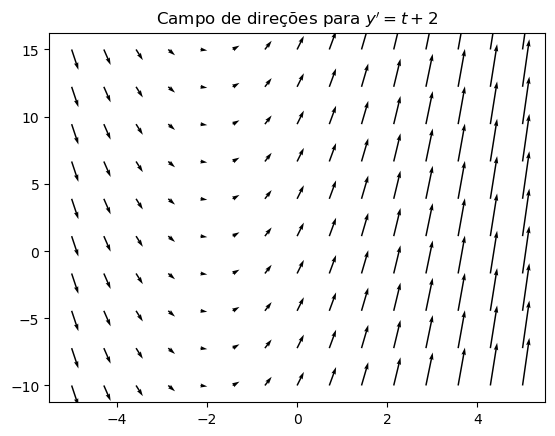

In [4]:
t = np.linspace(-5, 5, 15)
y = np.linspace(-10, 15, 10)

tt, yy = np.meshgrid(t, y)

dy = tt + 2

plt.title("Campo de direções para $y'= t+2$")
plt.quiver(tt,yy,np.ones(dy.shape),dy,width=0.003)
plt.show()

Observe que, tomando a fórmula de diferenças finitas para frente, podemos escrever 

$$f(x_{i+1}) =  f(x_i) + f'(x_i)h$$

ou ainda 

$$y_{i+1} =  y_i + \frac{dy}{dx}(x_i,y_i)h$$

Então, tomando $u_0=8$ e $\frac{du}{dt}(t)=t+2$ do Exemplo 6.1, podemos escrever uma fórmula para obter aproximações para pontos da solução particular fazendo:

$$u_{i+1} =  u_i + \frac{du}{dt}(t_i,t_i)h$$

ou

$$u_{i+1} =  u_i + (t_i + 2)h$$



Assim, escolhendo $h=0,1$ obtemos as soluções aproximadas:

$u_1 = u_0 + (t_0+2)0,1 = 8 + (0+2)0,1 = 8,2$

$u_2 = u_1 + (t_1+2)0,1 = 8,2 + (0,1+2)0,1= 8,41$

$u_3 = u_2 + (t_2+2)0,1 = 8,41 + (0,2+2)0,1= 8,63$

$\vdots$

Vamos fazer as contas em Python:

In [5]:
u = 8
print("Aprox.", "Exata", "Erro")
for t in np.arange(0.0,1,0.1):
    u = u + (t+2)*0.1
    ue = t**2/2 + 2*t + 8
    print (np.round(u,3), ue, np.round(u-ue,3))

Aprox. Exata Erro
8.2 8.0 0.2
8.41 8.205 0.205
8.63 8.42 0.21
8.86 8.645 0.215
9.1 8.88 0.22
9.35 9.125 0.225
9.61 9.38 0.23
9.88 9.645 0.235
10.16 9.92 0.24
10.45 10.205 0.245


O método mostrado nesse exemplo chama-se Método de Euler e é usado para obter soluções numéricas de Problemas de Valor Inicial.

### Solução numérica de um PVI

Considere a equação diferencial ordinária, $y' = y$, cuja solução é dada por $y(x)=ce^x$ $c\in R$.

Como sabemos, a equação diferencial dada apresenta infinitas soluções, uma vez que, para cada valor escolhido para a constante $c$, temos uma solução, como, por exemplo, $y(x)=c_0e^x$,$y(x)=c_1e^x$,$y(x)=c_2e^x$,sendo $c_0$, $c_1$ , $c_2$ valores fixados,conforme exibido na figura abaixo.

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_III/refs/heads/main/Notebook%2006%20-%20M%C3%A9todo%20de%20Euler%20para%20EDOs%20e%201%C2%AA%20ordem/imagens/pvi01.png" width="560">

Se considerarmos que conhecemos o valor da função $y(x)$ em um ponto, isto é, $x = x_0$ , o valor de $y(x)$ é $y(x_0) = y_0$ e temos uma única solução para a equação proposta. Esta solução única é obtida quando usamos a solução geral da equação diferencial
no ponto $x = x_0$ e obtemos o valor da constante $c$, como segue: $$y(x_0)=y_0$$ 
então 
$$ce^{x_0} = y_0$$ 
logo 
$$c=y_0e^{0-x_0}$$

Assim, a solução única para a equação diferencial é dada por: 

$$y(x) = ce^x = y_0 e^{-x_0} e^x = y_0e^{(x-x_0)}$$

Portanto, $y(x) = y_0 e^{(x-x_0)}$, conforme exibido na figura.

**Definição:** Um Problema de Valor Inicial (PVI) de primeira ordem consiste de uma equação diferencial $y' = f (x,y)$, $x \geq x_0$ e uma condição inicial $y(x_0) = y_0$, em que $y_0$ é um valor dado, chamado de valor inicial.

Neste caso, podemos escrever o PVI da seguinte forma:

$$ 
\begin{cases} 
y'= f(x,y)\\ 
\\
y(x_0)=y_0
\end{cases}$$

Resolver o PVI consiste em determinar uma função $y(x)$ que satisfaça a equação diferencial $y' = f (x,y)$ e a condição inicial $y(x_0) = y_0$.

Se a função $f$ e $ \frac{\partial f}{\partial y}$ são contínuas, temos que o PVI apresenta solução única.


**Discretização:** Resolver numericamente um PVI consiste em calcular aproximações para $y = y(x)$ em pontos discretos $x_0,x_1,x_2,...,x_N$ de um intervalo $[a,b]$.

Para discretizar o intervalo $[a,b]$, tomamos $N$ subintervalos $(N \geq 1)$ e fazemos $x_n = x_0 + nh$, $n = 0,1,2,...,N$ com $x_0 =a$ e $x_N =b$,sendo $h = (x_N −x_0)/N$.

A este conjunto de pontos $x_0,x_1,x_2,...,x_N$ denominamos rede ou malha de pontos discretos, e calculamos aproximações para a função $y(x)$ nestes pontos, isto é, determinamos $y_n$ tal que $y_n \approx y(x_n)$, $n=0,1,...,N$.

A partir de um ponto inicial dado $y(x_0) = y_0$ (valor inicial), calculamos passo a passo, nos pontos 

$x_1 = x_0 +h$, 

$x_2 = x_0 +2h$, 

$x_3 = x_0 +3h$

,...,

$x_n = x_0 +nh$, 

soluções aproximadas $y_n$ para a solução exata $y(x_n)$, $n=0,1,2,...,N$, conforme ilustrado na figura a seguir.

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2006%20-%20M%C3%A9todo%20de%20Euler%20para%20EDOs%20e%201%C2%AA%20ordem/imagens/discretizacao.png?raw=true" width="560">

#### Método de Euler

Vamos agora estudar a solução de equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método numérico de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + \phi h$$

Assim, a estimativa da inclinação	é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 


<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig01.png" width="400">

A inclinação no início do intervalo é tomada como uma aproximação da inclinação média em todo o intervalo, com isso um erro é inserido. Em geral, quanto maior o tamanho do passo, maior é o erro nessa apoximação.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig02.png" width="400">

No método de Euler a inclinação é tomada como sendo a derivada primeira da função $f(x,y)$, ou seja, considerando que $\frac{dy}{dx} = f(x,y)$, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a partir de um valor inicial $y_0$ conhecido obtemos estimativas para os valores subsequentes $y_1, y_2, y_3, ...$ da função.

Esse método também é chamado de método de _Euler-Cauchy_ ou _ponto-inclinação_.

**Exemplo 6.2:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

de $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$. 

A solução exata é dada por $y = -5.x^4+4x^3-10x^2+8.5x+1$.

_Solução:_ Com um passo $h=0.5$, temos $x_0 = 0.0$, $x_1 = 0.5$, $x_2 = 1.0$, $x_3 = 1.5$, ..., $x_8=4.0$. Assim, a partir da equação 

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

com

$$f(x,y)= \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

e sabendo que em $x_0 = 0$ temos $y_0 = 1$ obtemos os valores de $y_1, y_2, y_3, ..., y_8$ 

Vamos fazer isso computacionalmente, em Python.

pontos xi: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
pontos yi: [1.0, 5.25, 5.875, 5.125, 4.5, 4.75, 5.875, 7.125, 7.0]


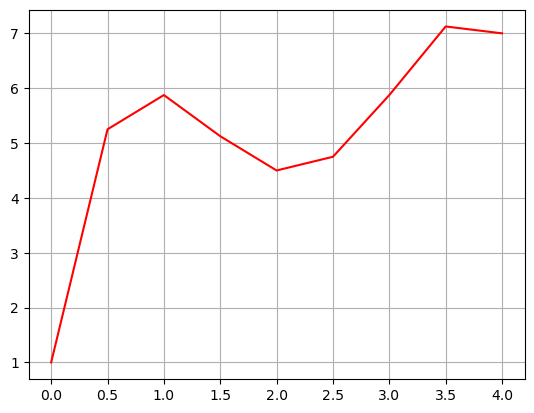

In [6]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
x0 = 0.0
xn = 4.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [1.0]                  

# entramos com f(x,y)
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

# laço para ir calculando os yi e preenchendo a lista
for x in X[0:-1]:
    Y.append(Y[-1] + f(x)*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)

# plota
plt.plot(X, Y, "r-")
plt.grid()
plt.show()

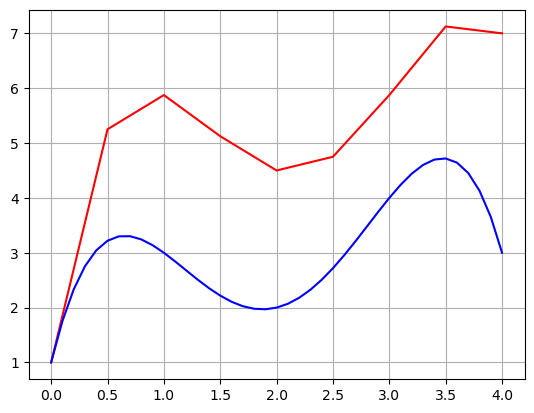

In [7]:
# plotando a solução exata para comparar
Xex = np.arange(0, 4.1, 0.1)

Yex = []
sol_ex = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1.0

for x in Xex:
    Yex.append(sol_ex(x))

plt.plot(X, Y, "r-", Xex, Yex, "b-")
plt.grid()
plt.show()

Nesse exemplo usamos um polinômio simples para a equação diferencial para facilitar a análise de erro a seguir. Logo,

$$\frac{dy}{dx} = f(x)$$

Um caso mais geral envolveria EDOs que dependam de $x$ e $y$, 

$$\frac{dy}{dx} = f(x,y)$$

Conforme progredirmos por esta parte do texto, nossos exemplos vão envolver cada vez mais EDOs que dependem tanto das variáveis dependentes quanto das independentes.

**Exemplo 6.3:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = x-y+2$$

de $x = 0$ a $x = 1$ com um tamanho de passo de $0.25$. A condição inicial em $x = 0$ é $y = 2$. 

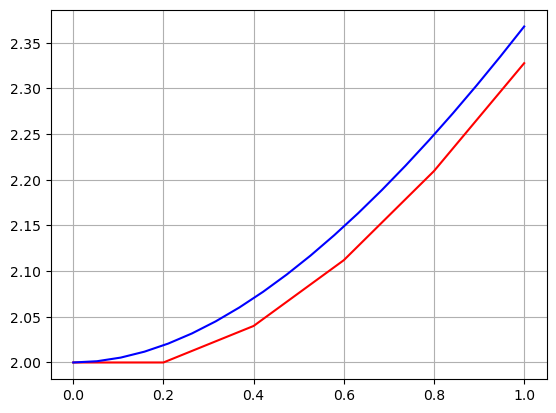

In [8]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.20; x0 = 0.0; xn = 1.0

X = np.arange(x0, xn+h, h); Y = [2.0]                  

f = lambda x,y: x-y+2

for n in range(len(X)-1):
    Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
    
s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

A seguir vamos usar SciPy para obter soluções numéricas de EDOs.

### Solução numérica de um PVI com SciPy

Usando a biblioteca `scipy` podemos obter uma solução numérica para um problema como esse usando a função `solve_ivp`, como é mostrado no código abaixo. Para isso, vamos primeiramente importar a função do módulo `integrate` usando a linha mostrada a seguir.

In [9]:
from scipy.integrate import solve_ivp

In [10]:
u = lambda t: (t**2/2)+2*t
# Definindo a função usando 'def'
def du(t, y): 
    return t+2

# Dados do problema
I = (0,5)
u0 = [1]
# Discretização do intervalo em 20 pontos
ti = np.linspace(I[0],I[1],20)

# Obtendo a solução
sol = solve_ivp(du, I, u0, t_eval=ti)
print(np.round(sol.y,4))

[[ 1.      1.5609  2.1911  2.8906  3.6593  4.4972  5.4044  6.3809  7.4266
   8.5416  9.7258 10.9792 12.3019 13.6939 15.1551 16.6856 18.2853 19.9543
  21.6925 23.5   ]]


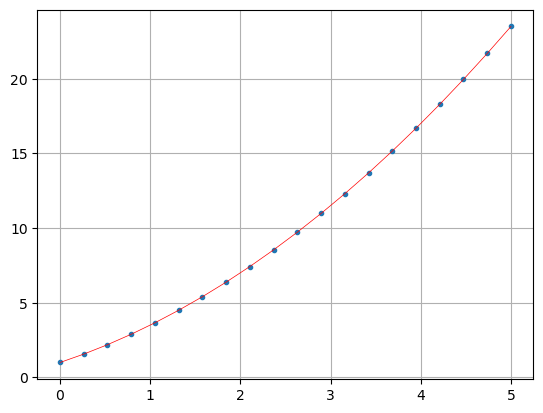

In [11]:
plt.plot(ti, sol.y[0],'.')
plt.plot(ti, u(ti)+u0, 'r', lw=0.5)
plt.grid()
plt.show()

O método usado por padrão na função `solve_ivp` é o `RK45`, ou seja,  o método Runge-Kutta explícito de ordem 5(4). O erro é controlado assumindo a precisão do método de quarta ordem, mas os passos são executadas usando a fórmula precisa de quinta ordem. Mais informações sobre outros métodos disponíveis e sua descrição podem ser acessadas em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

**Exemplo 6.4:** Vamos obter a solução da equação $y' + y = \cos(t)$ com a condição inicial $y(0) = 1$ e plotar solução juntamente com o campo de direções.

In [12]:
import sympy as sp

In [13]:
t, C1 = sp.symbols('t, C1')
y = sp.Function('y')(t)

# uma outra forma de declarar a derivada
dy = sp.Derivative(y,t)

eq = sp.Eq(dy+y, sp.cos(t))
sol = sp.dsolve(eq)
display(sol)

Eq(y(t), C1*exp(-t) + sin(t)/2 + cos(t)/2)

ou

In [14]:
sol.expand()

Eq(y(t), C1*exp(-t) + sin(t)/2 + cos(t)/2)

Aplicando a condição inicial $y(0)=1$ encontramos $C_1=1/2$. Para fazer as contas com o  SymPy podemos montar a equação substituindo $t=0$ no lado direito (`rhs`) da equação acima usando `subs` e igualando a $1$. Depois basta resolver a equação para $C_1$ usando `solveset`, como é mostrado abaixo:

In [15]:
eq = sp.Eq(1, sol.rhs.subs(t,0))
display(eq)

Eq(1, C1 + 1/2)

In [16]:
display(sp.solveset(eq, C1))

{1/2}

Agora podemos plotar a solução particular mostrada abaixo e o campo de direções.

In [17]:
sol.expand().subs(C1,1/2)

Eq(y(t), sin(t)/2 + cos(t)/2 + 0.5*exp(-t))

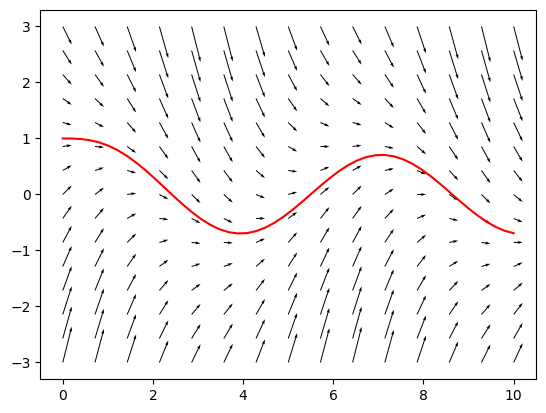

In [18]:
t = np.linspace(0, 10, 15)
y = np.linspace(-3, 3, 15)

tt, yy = np.meshgrid(t, y)
dy = -yy + np.cos(tt)
plt.quiver(tt,yy,np.ones(dy.shape),dy,width=0.002)

ti = np.linspace(0, 10, 50)
yi = np.cos(ti)/2 + np.sin(ti)/2 + 0.5*np.exp(-ti)

plt.plot(ti,yi,'r')
plt.show()

### Exercícios

**1.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $2$ em que $y(0)=1$ analiticamente e numericamente, usando o método de Euler ($h=0,5$ e $0,25$) e plote as soluções.
$$
\frac{d y}{d t}=y t^2-1,1 y
$$


**2.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $1$ em que $y(0)=1$ analiticamente e numericamente, usando o método de Euler ($h=0,5$ e $0,25$) e plote as soluções.

$$
\frac{d y}{d t}=(1+4 t) \sqrt{y}
$$

**3.** Usando o método de Euler, determine uma solução aproximada para o PVI dado por

$$ \begin{cases} 
y'= -3y+6x+5 \\ 
y(0)=3   
\end{cases}$$

com $x \in [0,1]$ e $N=10$. Compare com a solução exata $y(x)=2e^{-3x}+2x+1$.

**4.** 
Dados o PVI abaixo e a sua solução exata, use dois métodos diferentes para estimar $u(t)$ com o passo sugerido, plote e comente os resultados.

$$ \begin{cases} 
u'= t^2(5-u)\\ 
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$

Solução exata: $u(t)=5-5e^{-t^3/3}$. Use passo $h=0,25$ e também $h=0,1$.


**5.** Use o método de Euler para obter uma aproximação para as soluções de cada um dos seguintes problemas de valor inicial.

a. $y^{\prime}=t e^{3 t}-2 y, \quad 0 \leq t \leq 1, \quad y(0)=0, \quad$ com $h=0,5$

b. $y^{\prime}=1+(t-y)^2, \quad 2 \leq t \leq 3, \quad y(2)=1, \quad \operatorname{com} h=0,5$

c. $y^{\prime}=1+y / t, \quad 1 \leq t \leq 2, \quad y(1)=2, \quad \operatorname{com} h=0,25$

d. $y^{\prime}=\cos 2 t+\operatorname{sen} 3 t, \quad 0 \leq t \leq 1, \quad y(0)=1, \quad \operatorname{com} h=0,25$

**6.** Use o método de Euler para obter uma aproximação para as soluções de cada um dos seguintes problemas de valor inicial.

a. $y^{\prime}=e^{t-y}, \quad 0 \leq t \leq 1, \quad y(0)=1, \quad \operatorname{com} h=0,5$

b. $y^{\prime}=\frac{1+t}{1+y}, \quad 1 \leq t \leq 2, \quad y(1)=2, \quad \operatorname{com} h=0,5$

c. $y^{\prime}=-y+t y^{1 / 2}, \quad 2 \leq t \leq 3, \quad y(2)=2, \quad$ com $h=0,25$

d. $y^{\prime}=t^{-2}(\operatorname{sen} 2 t-2 t y), \quad 1 \leq t \leq 2, \quad y(1)=2, \quad \operatorname{com} h=0,25$

**Referências**

ARENALES, Selma; DAREZZO, Artur. Cálculo Numérico: aprendizagem com Apoio de Software. [Digite o Local da Editora]: Cengage Learning Brasil, 2016. E-book. ISBN 9788522112821. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788522112821/. Acesso em: 09 abr. 2024.

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. [Digite o Local da Editora]: Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

BURDEN, Richard L.; FAIRES, J D.; BURDEN, Annette M. Análise Numérica - Tradução da 10ª edição norte-americana. 3. ed. Porto Alegre: +A Educação - Cengage Learning Brasil, 2016. E-book. p.298. ISBN 9788522123414. Disponível em: https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/. Acesso em: 06 mai. 2025.


CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. [Digite o Local da Editora]: Grupo A, 2016. E-book. ISBN 9788580555691. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788580555691/. Acesso em: 09 abr. 2024.